
## 1. Vorbereitung

In diesem Tutorial lernen wir, wie die lineare Regression (ein Connectionist Neuron mit linearer Transferfunktion) in **Scikit-Learn** benutzt werden kann. Wir beschäftigen uns wieder mit einem konstruierten Datensatz, den wir im Folgenden laden.

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [3]:
# Ändern Sie den Datensatz entsprechend Ihrer Gruppennummer
# TODO: Datensatz laden
data = pd.read_csv("../data/toy_automobile/toy_auto_data_A.csv")

X = data["Alter"].values
X = X.reshape(-1, 1)

y = data["Verkaufspreis [Tsd €]"].values

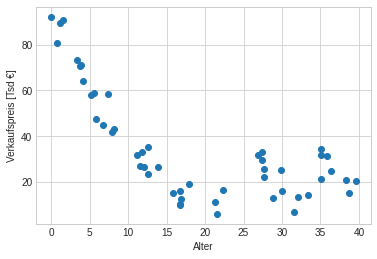

In [4]:
# TODO: Visualisieren
xx = np.linspace(0, 40, 100)

plt.close("all")
plt.figure()                       
plt.scatter(X, y)
plt.xlabel("Alter")
plt.ylabel("Verkaufspreis [Tsd €]");

## 2. Lineare Regression fitten

### 2.1 Lineare Regression in Scikit-Learn

Die "lineare" Regression meint hier ein Connectionist Neuron mit den normalen Features - ohne Expansion der Features. Wir nutzen **Scikit-Learn**.

In [5]:
# TODO: Importieren lineare Regression aus Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TODO: Modell trainieren
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
# TODO: Koeffizienten untersuchen

# Gewichte = Koeffizienten = coef_
print(model.coef_)

# Bias = Intercept = intercept_
print(model.intercept_)

[-1.37192485]
60.361617146729685


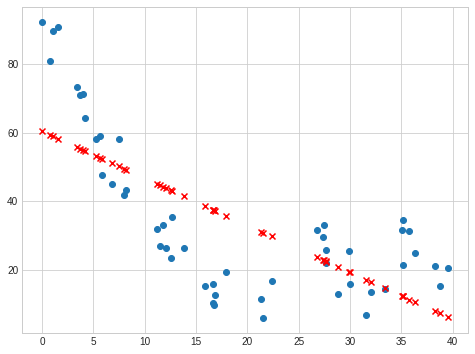

In [12]:
# TODO: Fit visualisieren - Vorhersage der y-Werte der Trainingsdaten
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.scatter(X, model.predict(X), color="red", marker="x")

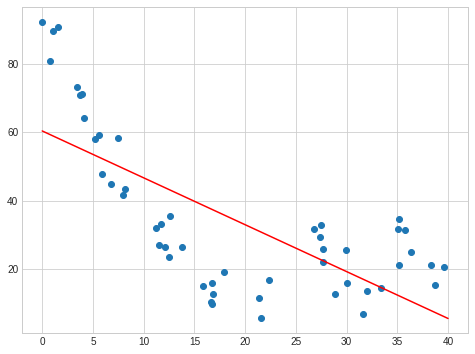

In [13]:
# TODO: Fit visualisieren - Vorhersage der y-Werte durch Absuchen des x-Raums
x_vis = np.linspace(0, 40, 100).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(x_vis, model.predict(x_vis), color="red")

In [15]:
# TODO: Modell evaluieren
test_data = pd.read_csv("../data/toy_automobile/toy_auto_data_test.csv")

X_test = test_data.loc[:, ["Alter"]].values
y_test = test_data.loc[:, "Verkaufspreis [Tsd €]"].values

y_pred_test = model.predict(X_test)

def mean_squared_error(y_true, y_pred):
    return np.mean( (y_true - y_pred) ** 2)


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(
        mean_squared_error(y_true, y_pred)
    )

mse = mean_squared_error(y_test, y_pred_test)
print("MSE:", mse, "[Quadrat Tsd €]")

rmse = root_mean_squared_error(y_test, y_pred_test)
print("RMSE:", rmse, "[Tsd €]")

MSE: 312.152107426269 [Quadrat Tsd €]
RMSE: 17.667826901638726 [Tsd €]


### 2.2. Manuelle Feature Expansion

In diesem Teil expandieren wir die Datenmatrix manuell und führen erneut eine Regression aus.

[-5.91163803  0.1159693 ]
87.40418403134444


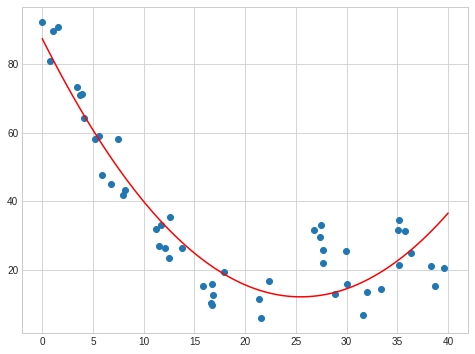

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# TODO: Daten manuell expandieren
X_new = np.column_stack((X, X**2))

# TODO: Modell trainieren
quadratic_model = LinearRegression(normalize=True)
quadratic_model.fit(X_new, y)


# TODO: Koeffizienten untersuchen
print(quadratic_model.coef_)
print(quadratic_model.intercept_)

# TODO: Fit visualisieren
x_vis = np.linspace(0, 40, 100).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)

x_vis_new = np.column_stack((x_vis, x_vis**2))

plt.plot(x_vis, quadratic_model.predict(x_vis_new), color="red")

### 2.3 Feature Expansion in Scikit-Learn

Die Expansion der Features kann effizienter mit Scikit-Learn ausgeführt werden.

Input features: 1
Output features: 2
Gewichte: [-5.91163803  0.1159693 ]
Bias: 87.40418403134444
RMSE: 9.384007501840765


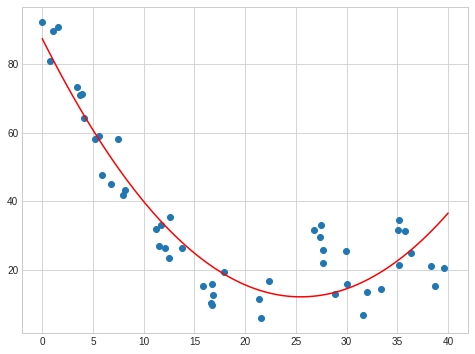

In [17]:
# TODO: Daten mit Scikit-Learn expandieren
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly_expansion = PolynomialFeatures(degree=2, include_bias=False)

poly_expansion.fit(X)
print("Input features:", poly_expansion.n_input_features_)
print("Output features:", poly_expansion.n_output_features_)
X_poly = poly_expansion.transform(X)
X_poly

# TODO: Modell trainieren
quadratic_model = LinearRegression(normalize=True)
quadratic_model.fit(X_poly, y)

# TODO: Koeffizienten untersuchen
print("Gewichte:", quadratic_model.coef_)
print("Bias:", quadratic_model.intercept_)


# TODO: Fit visualisieren
plt.figure(figsize=(8, 6))
plt.scatter(X, y)

x_vis_poly = poly_expansion.transform(x_vis)

plt.plot(x_vis, quadratic_model.predict(x_vis_poly), color="red")

# TODO: Modell evaluieren
X_test_poly = poly_expansion.transform(X_test)
y_pred = quadratic_model.predict(X_test_poly)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

### 2.4. Feature Expansion mit Scikit-Learn Pipelines

Pipelines sind eine Methode, die Modularität der **Scikit-Learn** Bibliothek voll auszunutzen und dabei zum Beispiel eine Feature Expansion durchzuführen.

Gewichte: [-5.91163803  0.1159693 ]
Bias: 87.40418403134444
RMSE: 9.384007501840765


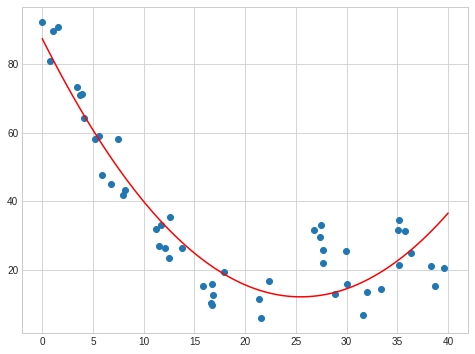

In [18]:
# TODO: Import und Aufbau einer Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression(normalize=True)
)

# TODO: Modell trainieren
pipeline_model.fit(X, y)


# TODO: Koeffizienten untersuchen
print("Gewichte:", pipeline_model[1].coef_)
print("Bias:", pipeline_model[1].intercept_)


# TODO: Fit visualisieren
x_vis = np.linspace(0, 40, 100).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(x_vis, pipeline_model.predict(x_vis), color="red")

# TODO: Modell evaluieren
y_pred = pipeline_model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))